# Train Data Cleaning

After splitting the dataset with stratification, let's proceed to analyze it, cleaning it, do feature engineering and make it ready for modeling. The exactly same procedure will be applied to the Test test.

In [516]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## EDA and Feature Engineering per column

Since we have many features, with diverse types, the idea is to go one by one, analyzing all columns and getting information to act with.

Let's see what we have!:

In [517]:
wdf = pd.read_csv("../input/train.csv")
wdf.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,5,40205.0
1,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,18-24 years old,Man,No,Straight / Heterosexual,European,None of the above,None of the above,NaN,2,60307.0
2,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,Engineering manager,20 to 99 employees,United States of America,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",14.0,10,194400.0
3,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",2 to 9 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,65000.0
4,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,110000.0


### `Education` column:

In [518]:
# before processing
wdf["Education"].unique()

array(['Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', nan], dtype=object)

In [519]:
wdf['Education'] = wdf['Education'].str.replace('â€™', '\'')

# function from https://www.kaggle.com/code/soheiltehranipour/stackoverflow-2022-salary-prediction
def clean_education(x):
    if pd.isna(x):
        return x
    if 'Bachelor\'s degree' in x:
        return 'Bachelor\'s degree'
    if 'Master\'s degree' in x:
        return 'Master\'s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelor\'s'

wdf['Education'] = wdf['Education'].apply(clean_education)


In [520]:
# after processing, looking more clean!
wdf["Education"].unique()

array(["Master's degree", "Bachelor's degree", "Less than a Bachelor's",
       'Post grad', nan], dtype=object)

- **Fixing Typos**: Cleaned up unwanted characters in the 'Education' column.
- **Simplifying Education Levels**: Used a function to group various education levels into four simpler categories.
- **Checking Our Work**: Displayed the unique values after cleaning to ensure everything looks good.

### `Remote_work` column:

In [521]:
# before processing
wdf['Remote_work'].unique()

array(['Hybrid (some remote, some in-person)', 'Fully remote',
       'Full in-person', nan], dtype=object)

In [522]:
wdf['Remote_work'] = wdf['Remote_work'].map(lambda x: x.replace('Fully remote', 'remote').replace('Hybrid (some remote, some in-person)', 'hybrid').replace('Full in-person', 'in-person') if isinstance(x, str) else x)
wdf.dropna(subset=['Remote_work'], inplace=True)

In [523]:
# after processing
wdf['Remote_work'].unique()

array(['hybrid', 'remote', 'in-person'], dtype=object)

- **Checking Current States**: Initially, the unique values in the 'Remote_work' column were listed to understand the different categories present.
- **Simplifying Categories**: Updated the 'Remote_work' column to have simpler categories (remote, hybrid, in-person) using a mapping function which also handled non-string types gracefully.
- **Removing Missing Values**: Dropped rows with missing 'Remote_work' values to clean up the dataset.
- **Verification**: Reviewed the unique categories after the changes to ensure the cleanup was successful.


### `Coding_as_hobby` column

In [524]:
# before processing
wdf['Coding_as_hobby'].unique()

array(['Hobby', 'I donâ€™t code outside of work',
       'Hobby;Contribute to open-source projects;Freelance/contract work',
       'Hobby;Freelance/contract work',
       'Hobby;Contribute to open-source projects',
       'Hobby;Bootstrapping a business',
       'Hobby;Contribute to open-source projects;Bootstrapping a business',
       'Other (please specify):',
       'Hobby;Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Bootstrapping a business', 'Hobby;Other (please specify):',
       'Contribute to open-source projects',
       'Hobby;Bootstrapping a business;Freelance/contract work',
       'Freelance/contract work',
       'Hobby;Contribute to open-source projects;Other (please specify):',
       'Contribute to open-source projects;Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business',
       'Hobby

In [525]:
def hobbyfinder(value):
    if 'hobby' in str(value.lower()):
        return 'yes'
    else:
        return 'no'

wdf['Coding_as_hobby'] = wdf['Coding_as_hobby'].astype(str).apply(hobbyfinder)

In [526]:
# after processing
wdf['Coding_as_hobby'].unique()

array(['yes', 'no'], dtype=object)

- **Before Changes**: Displayed the unique values in the 'Coding_as_hobby' column to get an initial understanding of the data present.
- **Creating a Helper Function**: Crafted a `hobbyfinder` function to identify if a value contains the term 'hobby', signaling coding is pursued as a hobby.
- **Applying Changes**: Used the function to update the 'Coding_as_hobby' column, categorizing responses into 'yes' or 'no'.
- **After Changes**: Checked the unique values in the updated column to confirm the successful application of the function.

### `Certifications` column

In [527]:
# Note: actually these values are not certification number, there are just famous platforms. Hence better to filter like 'yes'/'no'

wdf['Certifications'].unique() 

array([nan, 'Udemy;Codecademy', 'Coursera;Udemy;Codecademy;edX;Udacity',
       'Coursera;Udemy;Pluralsight;edX', 'Coursera;Udemy;Udacity',
       'Udemy', 'Codecademy', 'Coursera;Udemy;edX', 'Pluralsight',
       'Codecademy;Pluralsight', 'Udemy;Codecademy;Pluralsight',
       'Udemy;Pluralsight', 'Pluralsight;Udacity', 'Coursera;Udemy;Other',
       'Coursera', 'Udemy;Pluralsight;Udacity', 'Other',
       'Coursera;Udemy;edX;Udacity', 'Coursera;Pluralsight',
       'Coursera;Udemy', 'Coursera;Codecademy', 'Coursera;Other',
       'Udemy;Codecademy;Pluralsight;edX;Udacity', 'Coursera;Udacity',
       'Coursera;Codecademy;edX;Other', 'Codecademy;Skillsoft',
       'Coursera;Udemy;Codecademy;Pluralsight', 'Udemy;Codecademy;Other',
       'edX', 'Coursera;Udemy;Codecademy;Pluralsight;edX;Udacity',
       'Coursera;Udemy;Codecademy', 'Pluralsight;Other',
       'Codecademy;Other', 'Coursera;Udemy;Codecademy;edX',
       'Udemy;Udacity', 'Coursera;Codecademy;Other',
       'Coursera;Plural

In [528]:
def certification_status(x):
    if pd.isnull(x):
        return 'no'
    else:
        return 'yes'

wdf['Certifications'] = wdf['Certifications'].apply(certification_status)

In [529]:
# after processing
wdf['Certifications'].unique()

array(['no', 'yes'], dtype=object)

- **Initial Inspection**: Reviewed the unique values in the 'Certifications' column, noting that the values are platforms rather than actual certification numbers.
- **Defining a Function**: Created a `certification_status` function to classify each entry as either 'yes' (if a platform is mentioned) or 'no' (if the field is empty or NaN).
- **Applying the Transformation**: Used the defined function to update the 'Certifications' column to contain simplified 'yes' or 'no' values based on the presence of a value.
- **Confirmation**: Verified the transformation by checking the unique values in the updated column.


### `Physical_dissability` column

In [530]:
# before processing. 
# note: for physical only 2547 responses, hence 'yes'/'no' binary system applied again + 'Prefer not to say'

wdf['Physical_disability'].unique()

array(['None of the above', nan, 'I am deaf / hard of hearing',
       'Prefer not to say', 'I am blind / have difficulty seeing',
       'Or, in your own words:',
       'I am unable to / find it difficult to walk or stand without assistance',
       'I am deaf / hard of hearing;I am unable to / find it difficult to walk or stand without assistance',
       'I am unable to / find it difficult to type',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'Or, in your own words:;I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'Or, in your own words:;I am unable to / find it difficult to walk or stand without assistance',
       'Or, in your own words:;I am deaf / hard of hearing',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing;I am unable to / find it difficult to type;I am unable to / find it difficult to walk or stand without assistance',
       'I am deaf / hard of hearing;I am blind / have difficulty seei

In [531]:
# number of rows with 'Prefer not to say' VS total number of rows
print(wdf['Physical_disability'].value_counts().sum())
print(wdf[wdf['Physical_disability'] == 'Prefer not to say'].value_counts().sum())

29223
244


In [532]:
def physical_disability(x):
    if pd.isnull(x) or x == 'None of the above':
        return 'no' # imputing missing values as 'no' since it is the most common
    if x == 'Prefer not to say':
        return x
    else:
        return 'yes'

wdf['Physical_disability'] = wdf['Physical_disability'].apply(physical_disability)

In [533]:
# after processing
wdf['Physical_disability'].unique()

array(['no', 'yes', 'Prefer not to say'], dtype=object)

- **Initial Analysis**: Identified the unique values in the 'Physical_disability' column and noted the frequency of each response, including 'Prefer not to say'.
- **Function Definition**: Formed a function, `physical_disability`, to:
  - Assign 'no' to NaN values or responses indicating 'None of the above', assuming no disability in these cases.
  - Maintain 'Prefer not to say' responses as they are.
  - Label all other responses as 'yes', indicating the presence of a physical disability.
- **Implementing Changes**: Used the function to revamp the 'Physical_disability' column, simplifying it into a more straightforward categorization system.
- **Validation**: Checked the unique values post-transformation to ensure the column was correctly updated.


### `Mental_disability` column

In [534]:
# before processing
# note: here we have 16,163 responses, hence we should distinguish among dissabilities

wdf['Mental_disability'].unique()

array(['I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder',
       'None of the above',
       'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
       'I have an anxiety disorder', nan,
       'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
       'I have an anxiety disorder;I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
       'Prefer not to say',
       "I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have learning differences (e.g., Dyslexic, Dyslexia, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       "I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       'I have an anxiety disorder;Or, in your own words:',
       "I have a mood or emotional dis

In [535]:
def simplify_mental_disability(x):
    if pd.isnull(x) or x == 'None of the above':
        return 'No'
    categories = {
        'I have a concentration and/or memory disorder': 'Memory_disorder',
        'I have an anxiety disorder': 'Anxiety_disorder',
        'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)': 'Mood_disorder',
        "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)": 'Autism',
        'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)': 'Learning_difficulties'
    }
    matches = [cat for keyword, cat in categories.items() if keyword in x]
    if len(matches) > 1:
        return 'Various_disabilities'
    elif len(matches) == 1:
        return matches[0]
    else:
        return 'Others'

wdf['Mental_disability'] = wdf['Mental_disability'].apply(simplify_mental_disability)


In [536]:
# after processing
wdf['Mental_disability'].value_counts()

No                       22038
Various_disabilities      2800
Memory_disorder           1355
Others                    1327
Anxiety_disorder          1176
Mood_disorder              912
Autism                     438
Learning_difficulties      364
Name: Mental_disability, dtype: int64

- **Pre-Processing Overview**: Assessed the different unique values in the 'Mental_disability' column, considering there were 16,163 responses that can be detailed further.
- **Function Creation**:
  - Developed a `simplify_mental_disability` function to reclassify entries:
      - 'No' for NaN values or responses stating 'None of the above'.
      - Specific categories for known disorders.
      - 'Various_disabilities' if an entry mentions more than one disorder.
      - 'Others' for all remaining cases.
- **Applying the Function**: Used the function to update the 'Mental_disability' column, mapping the original descriptions to the new simplified categories.
- **Post-Processing**: Reviewed the count of each newly defined category to understand the distribution in the updated column.


### `Company_size` column

In [537]:
wdf['Company_size'].unique()

array(['20 to 99 employees', '100 to 499 employees', '2 to 9 employees',
       '5,000 to 9,999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10,000 or more employees', '500 to 999 employees',
       '1,000 to 4,999 employees', 'I donâ€™t know', '10 to 19 employees',
       nan], dtype=object)

In [538]:
# Preprocess OrgSize column, soruce: https://www.kaggle.com/code/do1likethis/which-devs-get-paid-more-and-why#Modeling:-how-well-can-we-predict-earning?-What-variables-matter-most?

wdf['Company_size'] = wdf['Company_size'].fillna("None").replace({"10,000 or more employees": "XL",
                                      "20 to 99 employees": "S",
                                      "100 to 499 employees": "M",
                                      "1,000 to 4,999 employees": "L",
                                      "5,000 to 9,999 employees": "XL",
                                      "2 to 9 employees": "XS",
                                      "10 to 19 employees": "XS",
                                      "500 to 999 employees": "M",
                                      "Just me - I am a freelancer, sole proprietor, etc.": "XS",
                                      "I donâ€™t know": "None",
                                      "I prefer not to answer": "None"})

wdf['Company_size'] = wdf['Company_size'].replace('None', np.nan)

In [539]:
# after processing
wdf['Company_size'].unique()

array(['S', 'M', 'XS', 'XL', 'L', nan], dtype=object)

- **Pre-Processing Overview**: Inspected the unique values in the 'Company_size' column to identify the different categories present.
- **Data Cleaning**:
  - **Handling missing values**: Filled NaN entries with a temporary placeholder "None".
  - **Simplifying categories**: Replaced various size descriptions with simplified labels ranging from "XS" to "XL" based on the number of employees. Addressed special cases such as freelancers and non-responses with respective categories.
  - **Special characters issue**: Noticed and rectified the special character issue in the strings representing unknown responses and non-responses.
- **Post-Cleaning**: Re-examined the unique values in the 'Company_size' column to ensure the changes were applied correctly, and replaced the temporary "None" placeholder with NaN to represent unknown data accurately.


### `Age` column

In [540]:
# note: Looking good, we'll only check NANs later

wdf['Age'].unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old', nan], dtype=object)

### `Job_Type` column

In [541]:
# note: we need to simplify it since there are mixed and confusing values

wdf.Job_type.unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, part-time;Retired', 'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [542]:
def simplify_job_type(job_type):
    if pd.isnull(job_type):
        return job_type
    job_list = job_type.split(';')
    
    if len(job_list) > 1:
        return 'Other'
    elif 'Employed, full-time' in job_list:
        return 'Full-time employed'
    elif 'Employed, part-time' in job_list:
        return 'Part-time employed'
    elif 'Retired' in job_list:
        return 'Retired'
    else:
        return 'Independent contractor / Freelancer / Self-employed'

wdf['Job_type'] = wdf['Job_type'].apply(simplify_job_type)


In [543]:
# after processing
wdf.Job_type.unique()

array(['Full-time employed', 'Other',
       'Independent contractor / Freelancer / Self-employed',
       'Part-time employed'], dtype=object)

- **Pre-Processing Overview**: Checked the unique values in the 'Job_type' column to understand the kind of values present in the data.
- **Data Cleaning**:
  - **Missing Values**: Maintained NaN entries as they are without any change.
  - **Simplifying Categories**: Used a function to simplify the job types into clearer categories:
    - Single job types were categorized distinctly: 'Full-time employed', 'Part-time employed', 'Retired', and 'Independent contractor / Freelancer / Self-employed'.
    - Entries with mixed job types were categorized as 'Other'.
- **Post-Cleaning**: Verified the unique values in the 'Job_type' column after applying the function to ensure the categories were simplified accurately.


### `Country` column

In [544]:
# note: Here we will shorten the longer country names for simplicity

def shorten_country_name(name):
    shorten_dict = {
        'United Kingdom of Great Britain and Northern Ireland': 'UK & Northern Ireland',
        'United States of America': 'USA',
        'Bosnia and Herzegovina': 'Bosnia-Herz.',
        'Iran, Islamic Republic of...': 'Iran',
        'The former Yugoslav Republic of Macedonia': 'North Macedonia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela, Bolivarian Republic of...': 'Venezuela',
        "Lao People's Democratic Republic": 'Laos',
        'Democratic Republic of the Congo': 'DR Congo',
        'Congo, Republic of the...': 'Republic of Congo',
        'Libyan Arab Jamahiriya': 'Libya',
        'Hong Kong (S.A.R.)': 'Hong Kong',
    }
    
    return shorten_dict.get(name, name)

wdf['Country'] = wdf['Country'].apply(shorten_country_name)


In [545]:
# after processing
wdf['Country'].unique()

array(['UK & Northern Ireland', 'USA', 'Czech Republic', 'Austria',
       'Italy', 'Canada', 'Germany', 'Ireland', 'Poland', 'Israel',
       'Madagascar', 'Taiwan', 'Netherlands', 'France', 'Brazil',
       'Uruguay', 'Sweden', 'Spain', 'Turkey', 'Romania', 'Singapore',
       'India', 'Bulgaria', 'Greece', 'Russian Federation', 'Belgium',
       'Saudi Arabia', 'Mexico', 'Switzerland', 'Latvia', 'South Africa',
       'Thailand', 'China', 'Finland', 'Slovakia', 'Japan', 'Denmark',
       'Australia', 'Viet Nam', 'Portugal', 'Hungary', 'Tunisia',
       'Bangladesh', 'Ukraine', 'Maldives', 'Hong Kong', 'Norway',
       'Egypt', 'Serbia', 'Nepal', 'Argentina', 'Croatia', 'Armenia',
       'Lithuania', 'Iran', 'Belarus', 'Costa Rica', 'Pakistan',
       'Mauritius', 'Estonia', 'Kazakhstan', 'Morocco', 'Chile',
       'New Zealand', 'Slovenia', 'Cyprus', 'Philippines', 'Colombia',
       'Afghanistan', 'Andorra', 'Indonesia', 'Republic of Korea',
       'South Korea', 'Malaysia', 'Sri L

- **Pre-Processing Overview**: Checked the unique values in the 'Country' column to understand the different country names present.
- **Data Cleaning**:
  - **Shortening Country Names**: Created a dictionary to map the longer country names to their shorter, more simplified versions.
  - **Function Application**: Applied a function to shorten the country names based on the mapping dictionary created.
- **Post-Cleaning**: Verified the unique values in the 'Country' column after applying the function to ensure the country names were shortened as intended.


### `Ethnicity` column 

In [546]:
# before processing
# note: there are a lot of unique values due to multiracial options, this needs to be simplified

wdf.Ethnicity.value_counts()

White                                                             7367
European                                                          6741
White;European                                                    4021
Indian                                                            1523
Asian                                                              940
                                                                  ... 
European;Black;Caribbean                                             1
White;Or, in your own words:;European;Middle Eastern                 1
European;South Asian                                                 1
European;Hispanic or Latino/a;Multiracial;Biracial                   1
White;European;North American;Middle Eastern;Asian;Multiracial       1
Name: Ethnicity, Length: 613, dtype: int64

In [547]:
def simplify_ethnicity1(ethnicity):
    if pd.isna(ethnicity):
        return ethnicity
    if 'Or, in your own words:' in ethnicity:
        return 'Other'
    if 'Prefer not to say' in ethnicity:
        return 'Prefer not to say'
    
    ethnicities = ethnicity.split(';')
    if len(ethnicities) > 2:
        return 'Multiracial'
    elif len(ethnicities) == 2:
        return f"{ethnicities[0]};{ethnicities[1]}"
    else:
        return ethnicities[0]

wdf['Ethnicity'] = wdf['Ethnicity'].apply(simplify_ethnicity1)

In [548]:
def simplify_ethnicity2(ethnicity):
    if pd.isnull(ethnicity):
        return None
    if 'White' in ethnicity or 'European' in ethnicity:
        return 'White / European'
    if 'Indian' in ethnicity or 'South Asian' in ethnicity:
        return 'Indian / South Asian'
    if 'Asian' in ethnicity:
        return 'Asian'
    if 'Hispanic' in ethnicity or 'Latino' in ethnicity:
        return 'Hispanic or Latino/a'
    if 'Middle Eastern' in ethnicity or 'North African' in ethnicity:
        return 'Middle Eastern / North African'
    if 'African' in ethnicity or 'Black' in ethnicity:
        return 'African / Black'
    if 'North American' in ethnicity or 'Central American' in ethnicity:
        return 'North American / Central American'
    if 'Multiracial' in ethnicity or 'Biracial' in ethnicity:
        return 'Multiracial'
    if "Prefer not to say" in ethnicity or "I don't know" in ethnicity:
        return 'Prefer not to say / I don\'t know'
    return 'Other'

wdf['Ethnicity'] = wdf['Ethnicity'].apply(simplify_ethnicity2)

In [549]:
simplified_ethnicity_percentage = wdf['Ethnicity'].value_counts() / wdf['Ethnicity'].notna().sum() * 100
print(simplified_ethnicity_percentage)

White / European                     65.980343
Indian / South Asian                  7.459604
Asian                                 5.943695
Multiracial                           5.180743
Other                                 4.204564
Hispanic or Latino/a                  3.808096
Middle Eastern / North African        2.418791
Prefer not to say / I don't know      2.298851
African / Black                       1.819090
North American / Central American     0.886224
Name: Ethnicity, dtype: float64


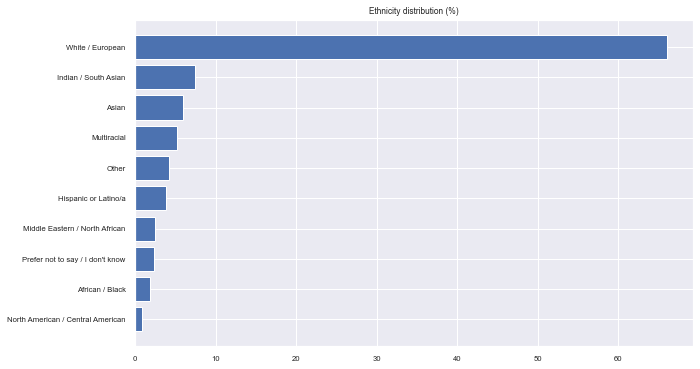

In [550]:
plt.figure(figsize=(10,6))

# Get the percentages of each unique value
percentages = wdf['Ethnicity'].value_counts(normalize=True) * 100

# Sorting the percentages in ascending order
sorted_indices = percentages.sort_values(ascending=True).index

# Plotting the bar chart using the sorted indices to extract the correct percentages
plt.barh(sorted_indices, percentages[sorted_indices])
plt.title("Ethnicity distribution (%)")
plt.xticks(rotation=0) # Rotate x labels for better readability
plt.savefig('../paper/data-preparation/train/ethnicity-distribution.pdf')
plt.show()


- **Pre-Processing Overview**: Checked the value counts in the 'Ethnicity' column to comprehend the distribution and diversity of the responses.

- **Data Cleaning**:
  - **Step 1 – Simplifying Multiracial Responses**:
    - Created a function `simplify_ethnicity1` to simplify the responses with multiple racial identifications into broader categories such as 'Multiracial' or a combination of two ethnicities separated by a semicolon.
    - Handled special cases where respondents preferred not to say or used their own words to describe their ethnicity.
  - **Step 2 – Grouping Ethnicities**:
    - Developed a second function `simplify_ethnicity2` to group the simplified responses from Step 1 into broader categories based on the presence of keywords in the ethnicity description.
    - Replaced the 'Ethnicity' column values using the `simplify_ethnicity2` function to have more grouped and broader categories.

- **Post-Cleaning**:
  - **Insights**: Calculated the percentage of each category in the simplified 'Ethnicity' column to understand the distribution of the cleaned data.


### `Gender` column

In [551]:
wdf.Gender.value_counts()

Man                                                                                   28073
Woman                                                                                  1362
Prefer not to say                                                                       283
Non-binary, genderqueer, or gender non-conforming                                       251
Or, in your own words:                                                                   94
Man;Non-binary, genderqueer, or gender non-conforming                                    92
Man;Or, in your own words:                                                               59
Woman;Non-binary, genderqueer, or gender non-conforming                                  58
Man;Woman;Non-binary, genderqueer, or gender non-conforming                               8
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  7
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [552]:
wdf.Trans.value_counts()

No                        29398
Prefer not to say           346
Yes                         306
Or, in your own words:      161
Name: Trans, dtype: int64

In [553]:
# Modify the column gender with the info of trans == yes, else, stay the same
wdf['Gender'] = wdf.apply(lambda row: 'Trans' if row['Trans'] == 'Yes' else row['Gender'], axis=1)

# Delete column 'Trans'
wdf = wdf.drop('Trans', axis=1)

In [554]:
wdf.Gender.value_counts()

Man                                                                                   28019
Woman                                                                                  1267
Trans                                                                                   306
Prefer not to say                                                                       273
Non-binary, genderqueer, or gender non-conforming                                       159
Or, in your own words:                                                                   89
Man;Non-binary, genderqueer, or gender non-conforming                                    80
Man;Or, in your own words:                                                               59
Woman;Non-binary, genderqueer, or gender non-conforming                                  31
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming        5
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming        

In [555]:
def process_values(value):
    if value is None or pd.isna(value):
        return float('nan')
    
    value = str(value)
    
    if 'Or, in your own words:' in value:
        split_values = value.split(';')
        split_values = [v.strip() for v in split_values if v.strip() != 'Or, in your own words:']
        if len(split_values) == 0:
            return float('nan')
        else:
            return ';'.join(split_values)
    else:
        return value

# Aplicar la función a la columna
wdf['Gender'] = wdf['Gender'].apply(process_values)


In [556]:
wdf.Gender.value_counts()

Man                                                            28078
Woman                                                           1269
Trans                                                            306
Prefer not to say                                                273
Non-binary, genderqueer, or gender non-conforming                163
Man;Non-binary, genderqueer, or gender non-conforming             83
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Woman;Non-binary, genderqueer, or gender non-conforming        8
Man;Woman                                                          3
Name: Gender, dtype: int64

In [557]:
def categorize_gender(value):
    if isinstance(value, str):  
        if 'Non-binary, genderqueer, or gender non-conforming' in value or 'Man;Woman' in value:
            return 'gender non-conforming'
        else:
            return value
    else:  
        return value

wdf['Gender'] = wdf['Gender'].apply(categorize_gender)


In [558]:
wdf.Gender.value_counts()

Man                      28078
Woman                     1269
Trans                      306
gender non-conforming      290
Prefer not to say          273
Name: Gender, dtype: int64

- **Objective**: To clean the 'Gender' column by removing entries specified as 'Or, in your own words:' and retaining the other gender categories, or setting it to NaN if no other categories are mentioned.
  
- **Approach**:
  - **Creating the `process_values` Function**: Defined a function to individually process each value in the column based on the following steps:
    1. **Handle Missing Values**: Returned NaN for None or NaN inputs.
    2. **Value Conversion**: Converted the input value to a string for further processing.
    3. **Identifying and Splitting Values**: If 'Or, in your own words:' was found in the value, it was split by semicolon to separate it from other categories.
    4. **Refining Values**: Removed 'Or, in your own words:' from the list of split values and checked if any values remained. If not, returned NaN.
    5. **Rejoining Values**: If there were remaining values, rejoined them using a semicolon.

  - **Function Application**: Utilized the `apply` method to execute the `process_values` function on every entry in the 'Gender' column, effectively cleaning and updating the column data.

- **Outcome**: The 'Gender' column is updated to retain meaningful gender categories while removing the less informative 'Or, in your own words:' entries or replacing them with NaN where necessary.


### `Sexual_orientation` Column



In [559]:
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual                                                           25346
Prefer not to say                                                                  1253
Bisexual                                                                           1120
Gay or Lesbian                                                                      576
Prefer to self-describe:                                                            304
Bisexual;Straight / Heterosexual                                                    162
Queer                                                                               160
Bisexual;Queer                                                                      120
Straight / Heterosexual;Prefer to self-describe:                                     69
Gay or Lesbian;Queer                                                                 58
Straight / Heterosexual;Queer                                                        44
Bisexual;Gay or Lesbian         

In [560]:
def process_values(value, remove_phrase):
    if pd.isnull(value):
        return pd.NA

    value = str(value)

    if remove_phrase in value:
        parts = value.split(';')
        parts = [part for part in parts if part != remove_phrase]
        
        if not parts:
            return pd.NA

        value = ';'.join(parts)
    
    return value

wdf['Sexual_orientation'] = wdf['Sexual_orientation'].apply(lambda x: process_values(x, 'Prefer to self-describe:'))


In [561]:
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual                                  25415
Prefer not to say                                         1253
Bisexual                                                  1126
Gay or Lesbian                                             580
Queer                                                      175
Bisexual;Straight / Heterosexual                           165
Bisexual;Queer                                             128
Gay or Lesbian;Queer                                        62
Straight / Heterosexual;Queer                               51
Bisexual;Gay or Lesbian                                     25
Bisexual;Gay or Lesbian;Queer                               21
Bisexual;Straight / Heterosexual;Gay or Lesbian;Queer       15
Bisexual;Straight / Heterosexual;Queer                      10
Bisexual;Straight / Heterosexual;Gay or Lesbian              6
Straight / Heterosexual;Gay or Lesbian                       4
Name: Sexual_orientation, dtype: int64

In [562]:
def simplify_sexual_orientation(value):
    if pd.isnull(value):
        return pd.NA

    value = str(value)

    if 'Straight / Heterosexual' in value:
        return 'Straight / Heterosexual'
    elif 'Prefer not to say' in value:
        return 'Prefer not to say'
    elif 'Bisexual' in value:
        return 'Bisexual'
    elif 'Gay or Lesbian' in value:
        return 'Gay or Lesbian'
    elif 'Queer' in value:
        return 'Queer'
    else:
        return 'Other'

wdf['Sexual_orientation'] = wdf['Sexual_orientation'].apply(simplify_sexual_orientation)


In [563]:
# after processing
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual    25666
Bisexual                    1300
Prefer not to say           1253
Gay or Lesbian               642
Queer                        175
Name: Sexual_orientation, dtype: int64

- **Objective**: 

Streamline the 'Sexual_orientation' column by categorizing the varied responses into more general groups to facilitate easier analysis.

- **Approach**:
  - **Developing the `simplify_sexual_orientation` Function**: Formulated a function that simplifies individual entries based on specific conditions:
    1. **Self-Described Category**: When the entry contains 'Prefer to self-describe', it is updated to 'Other'.
    2. **Preference Not to Disclose**: Entries containing 'Prefer not to say' are left as 'Prefer not to say'.
    3. **Multiple Values**: Entries containing multiple values, indicated by a semicolon (;), are updated to 'Other'.
    4. **Unchanged Values**: If none of the above conditions are met, the original value is retained.
   
  - **Applying the Function**: Leveraged the `apply()` method to implement the `simplify_sexual_orientation` function on each value in the 'Sexual_orientation' column, thereby updating the dataset as required.

- **Outcome**: The 'Sexual_orientation' column now has simplified, more manageable categories, making it more conducive to analysis.


### `Experience` column (part 1)

Here there are a lot of missing values... we need to impute them later

In [564]:
wdf.Work_experience.isna().sum()

8684

In [565]:
wdf["Work_experience"] = wdf["Work_experience"].round(1) # for simplicity, rounding one decimal

In [566]:
wdf.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Bisexual,White / European,no,Various_disabilities,NaN,5,40205.0
1,Full-time employed,hybrid,no,Bachelor's degree,no,"Developer, full-stack;Developer, back-end",M,UK & Northern Ireland,18-24 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,2,60307.0
2,Other,remote,yes,Bachelor's degree,no,Engineering manager,S,USA,35-44 years old,Man,Straight / Heterosexual,White / European,no,Mood_disorder,14.0,10,194400.0
3,Full-time employed,hybrid,yes,Bachelor's degree,no,"Developer, full-stack",XS,USA,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,5.0,5,65000.0
4,Other,remote,yes,Master's degree,no,"Developer, full-stack;Academic researcher;DevO...",XL,USA,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,5.0,5,110000.0


### `Annual_salary` column

There are a lot of trolls regarding salary data...

In [567]:
wdf.Annual_salary.min(), wdf.Annual_salary.max()

(1.0, 50000000.0)

Let's see the salaries distribution setting up a top limit in 500,000 $:

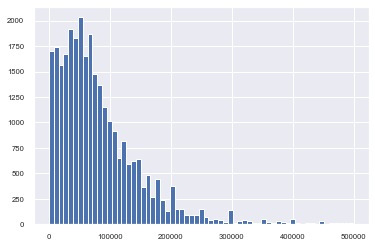

In [568]:
wdf[wdf.Annual_salary < 500000].Annual_salary.hist(bins='scott')
plt.savefig("../paper/data-preparation/train/salary-distrib-0-500000.pdf");

As we can see in the histogram, most values don't go further than 300.000$. Let's start trimming down from 10.000$ till 350.000$.

In [569]:
# Filtering extreme values
lower_limit = 10000 #wdf['Annual_salary'].quantile(0.1)
upper_limit = 350000 #wdf['Annual_salary'].quantile(0.95)
wdf = wdf.loc[wdf['Annual_salary'].between(lower_limit, upper_limit)]

# Reset index
wdf = wdf.reset_index(drop=True)
print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")

Lower Limit: 10000.00, Upper Limit: 350000.00


In [570]:
wdf['Annual_salary'].shape[0]

26710

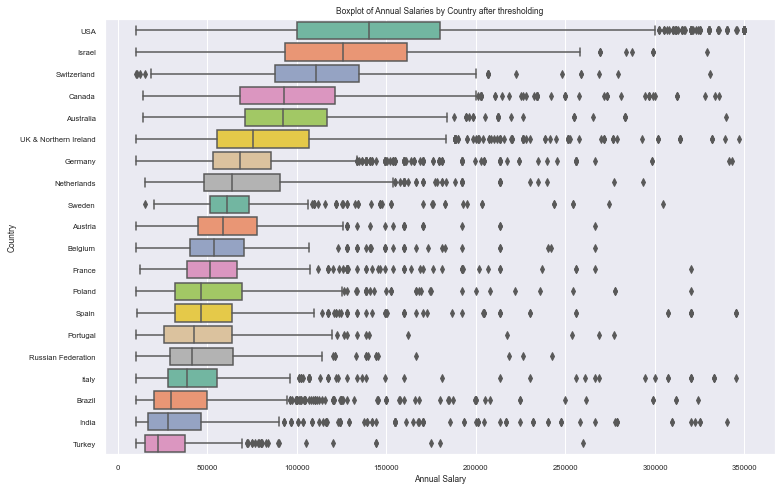

In [571]:
# Get the top 20 countries by frequency
top_20_countries2 = wdf['Country'].value_counts().head(20).index

# Filter the dataset to include only the top 20 countries
filtered_wdf = wdf[wdf['Country'].isin(top_20_countries2)]

# Get the number of cases per country
country_counts = filtered_wdf.groupby('Country')['Annual_salary'].count().reset_index()
country_counts.columns = ['Country', 'Number of cases']

# Merge the number of cases with the filtered_wdf2 dataset
filtered_wdf2 = pd.merge(filtered_wdf, country_counts, on='Country')

# Sort the dataset by the number of values per country
sorted_countries2 = filtered_wdf2.groupby('Country')['Annual_salary'].median().sort_values(ascending=False).index

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Annual_salary', y='Country', data=filtered_wdf, palette='Set2', ax=ax, order=sorted_countries2)
plt.title('Boxplot of Annual Salaries by Country after thresholding')
plt.xlabel('Annual Salary')
plt.ylabel('Country')

plt.savefig("../paper/data-preparation/train/outliers-before-mad.pdf");

Despite salaries now have a normal distribution after applying some scalation, we still see a lot of multivariate outliers on each Country salary distribution.
One of the more robust methods to identify outliers, is the MAD. Hence, we will make a formula to identify the outliers per country and delete them using this method

In [572]:
# Calcular la mediana y el MAD por país
medians_and_mads = wdf.groupby('Country')['Annual_salary'].agg(['median', lambda x: np.median(np.abs(x - x.median()))]).reset_index()
medians_and_mads.columns = ['Country', 'Country_median', 'Country_mad']
# Agregar la mediana y el MAD de cada país al conjunto de datos original
wdf_with_medians_and_mads = pd.merge(wdf, medians_and_mads, on='Country')
wdf_with_medians_and_mads.Annual_salary.isnull().sum()

0

In [573]:
C = 2
scaled_country_mad = 1.4826 * wdf_with_medians_and_mads['Country_mad']
lower_limit = wdf_with_medians_and_mads['Country_median'] - C * scaled_country_mad
upper_limit = wdf_with_medians_and_mads['Country_median'] + C * scaled_country_mad

cleaned_wdf = wdf_with_medians_and_mads[(wdf_with_medians_and_mads['Annual_salary'] >= lower_limit) & (wdf_with_medians_and_mads['Annual_salary'] <= upper_limit)]


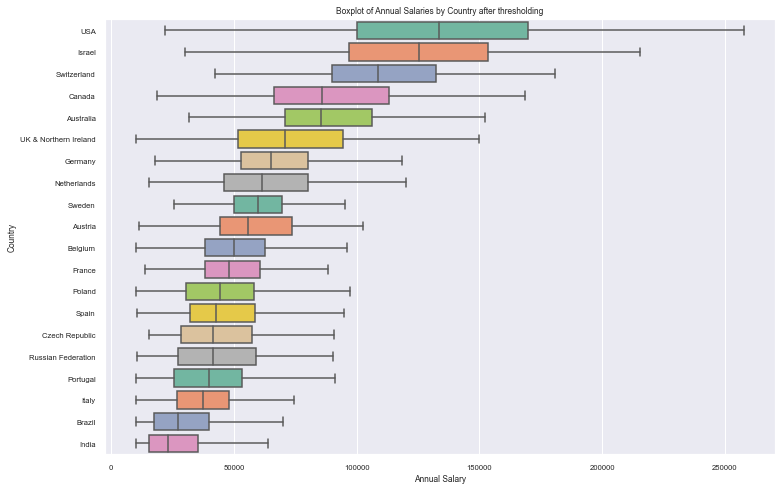

In [574]:
# Get the top 20 countries by frequency
top_20_countries2 = cleaned_wdf['Country'].value_counts().head(20).index

# Filter the dataset to include only the top 20 countries
filtered_wdf = cleaned_wdf[cleaned_wdf['Country'].isin(top_20_countries2)]

# Get the number of cases per country
country_counts = filtered_wdf.groupby('Country')['Annual_salary'].count().reset_index()
country_counts.columns = ['Country', 'Number of cases']

# Merge the number of cases with the filtered_wdf2 dataset
filtered_wdf2 = pd.merge(filtered_wdf, country_counts, on='Country')

# Sort the dataset by the number of values per country
sorted_countries2 = filtered_wdf2.groupby('Country')['Annual_salary'].median().sort_values(ascending=False).index

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Annual_salary', y='Country', data=filtered_wdf, palette='Set2', ax=ax, order=sorted_countries2)
plt.title('Boxplot of Annual Salaries by Country after thresholding')
plt.xlabel('Annual Salary')
plt.ylabel('Country')

plt.savefig("../paper/data-preparation/train/outliers-after-mad.pdf");

In [575]:
cleaned_wdf.shape, wdf.shape

((23996, 19), (26710, 17))

In [576]:
wdf = cleaned_wdf
wdf.drop(['Country_median', 'Country_mad'], axis=1, inplace=True)
wdf.head()

C:\Users\fenan\AppData\Local\Temp\ipykernel_4260\841836538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf.drop(['Country_median', 'Country_mad'], axis=1, inplace=True)


,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Bisexual,White / European,no,Various_disabilities,NaN,5,40205.0
1,Full-time employed,hybrid,no,Bachelor's degree,no,"Developer, full-stack;Developer, back-end",M,UK & Northern Ireland,18-24 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,2,60307.0
2,Full-time employed,remote,no,Bachelor's degree,no,"Developer, full-stack",S,UK & Northern Ireland,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,7.0,7,69102.0
3,Full-time employed,hybrid,yes,Post grad,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,3,52769.0
4,Full-time employed,remote,yes,Bachelor's degree,no,"Developer, back-end;Student;DevOps specialist;...",XS,UK & Northern Ireland,25-34 years old,Prefer not to say,Prefer not to say,Prefer not to say / I don't know,Prefer not to say,Various_disabilities,4.0,4,47743.0


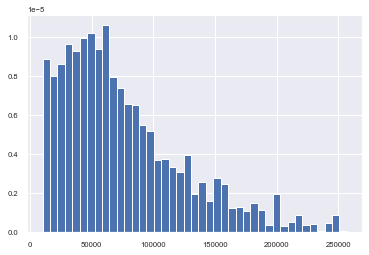

In [577]:
wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary.hist(bins='scott', density=True)
plt.savefig("../paper/data-preparation/train/salary-distrib-min-max.pdf");

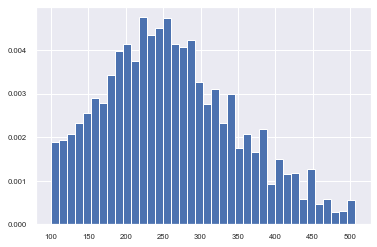

In [578]:
np.sqrt(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary).hist(bins='scott', density=True)
plt.savefig("../paper/data-preparation/train/salary-distrib-min-max-sqrt.pdf");

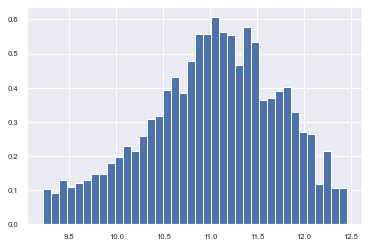

In [579]:
np.log(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary).hist(bins='scott', density=True)
plt.savefig("../paper/data-preparation/train/salary-distrib-min-max-log.pdf");

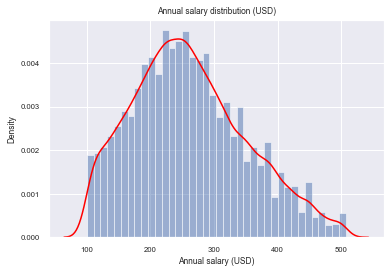

In [580]:
salaries = np.sqrt(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary)

fig, ax = plt.subplots()

sns.kdeplot(salaries, ax=ax, fill=False, color='red')
salaries.hist(ax=ax, bins='scott', alpha=0.5, density=True)

plt.xlabel('Annual salary (USD)')
plt.ylabel('Density')
plt.title('Annual salary distribution (USD)')

plt.savefig("../paper/data-preparation/train/salary-distrib-min-max-sqrt-chosen.pdf");


- **Initial Analysis**
    - **Min and Max Values**: Identified the range of the salaries.
    - **Histogram Plotting**: Visualized the initial data distribution with salaries less than 500,000.

- **Data Cleaning**
    - **Setting Thresholds**: Established lower and upper salary thresholds.
    - **Filtering Data**: Removed entries outside the thresholds and reset the data frame index.

- **Focus on Top 20 Countries**
    - **Identifying Top 20 Countries**: Selected top 20 countries by response count.
    - **Boxplot**: Visualized salary distribution in these countries before and after data cleaning.

- **Incorporating MAD and Median**
    - **Calculations**: Derived Median and Median Absolute Deviation (MAD) for each country.
    - **Data Merging**: Integrated these statistics into the main data frame for further analysis.

- **Further Cleaning using MAD**
    - **New Bounds**: Set new bounds using MAD and filtered the data to remove outliers.
    - **Final Dataset**: Obtained a cleaner dataset by removing entries outside these bounds.

- **Distribution Transformation**
    - **Histograms**: Explored normalization using square root and log transformations through histograms.
    - **Density Plot**: Created a density plot overlay on the square root transformed data histogram to visualize the distribution.

- **Outcome**
    - **Refined Data**: A dataset cleaned of outliers, ready for precise analyses.
    - **Visual Insights**: Detailed visuals providing insights into salary distribution across various countries and showcasing the impact of different data transformations.


### `Job_title` column

In [581]:
# Let's see the unique values of the 'Job_title' column
devs_list = []

# Itera sobre cada valor en la columna 'DevType'
for dev_type in wdf['Job_title']:
    # Si el valor actual no es nulo
    if not pd.isnull(dev_type):
        # Itera sobre cada subvalor del valor actual de 'DevType'
        for dev_sub_type in dev_type.split(';'):
            # Si el subvalor actual no está en devs_list y no contiene 'Other (please specify):', lo agrega
            if dev_sub_type.strip() not in devs_list and 'Other (please specify):' not in dev_sub_type:
                devs_list.append(dev_sub_type.strip())

devs_list

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, back-end',
 'Scientist',
 'Student',
 'DevOps specialist',
 'Project manager',
 'System administrator',
 'Data or business analyst',
 'Cloud infrastructure engineer',
 'Database administrator',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Educator',
 'Developer, embedded applications or devices',
 'Developer, QA or test',
 'Engineering manager',
 'Product manager',
 'Designer',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, game or graphics',
 'Security professional',
 'Blockchain',
 'Academic researcher',
 'Marketing or sales professional']

In [582]:
# Let's keep the rows with AI/ML related fields

AI_ML_devs = ['Data scientist or machine learning specialist',
 'Engineer, data',
 'Data or business analyst',
 'Scientist']

def check_AI_ML_dev(row):
    if pd.isna(row['Job_title']) or row['Job_title'] == '':
        return False
    dev_types = row['Job_title'].split(';')
    for dev in AI_ML_devs:
        if dev in dev_types:
            return True
    return False

# Filter DataFrame deleting rows where check_AI_ML_dev is False
wdf = wdf[wdf.apply(check_AI_ML_dev, axis=1)]

wdf['DevType_len'] = wdf['Job_title'].apply(lambda x: len(x.split(';')))
wdf = wdf.loc[wdf['DevType_len'] <= 4]
wdf = wdf.drop('DevType_len', axis=1)

# Let's see how many rows we have left
print(wdf.shape[0])

2260


C:\Users\fenan\AppData\Local\Temp\ipykernel_4260\2439887135.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf['DevType_len'] = wdf['Job_title'].apply(lambda x: len(x.split(';')))


In [583]:
wdf.Job_title.nunique()

607

We apply the following function to standardize and clean the "Job_title" column in the dataset. The function splits job titles, removes extra spaces, creates a list of unique titles, sorts them alphabetically, and then joins them back together with a consistent delimiter. By doing this, we ensure that the model treats job titles consistently, regardless of the order they appear in, which can lead to more accurate predictions. Also, it will 'Other (please specify):' from the options of Job titles


In [584]:
def clean_job_titles(job_title):
    job_list = job_title.split(';')
    job_list = [job.strip() for job in job_list]
    job_list = [job for job in job_list if job != 'Other (please specify):']
    unique_jobs = list(set(job_list))
    sorted_jobs = sorted(unique_jobs)
    return ';'.join(sorted_jobs)

wdf['Cleaned_Job_title'] = wdf['Job_title'].apply(clean_job_titles)
# Imprime las columnas 'Job_title' y 'Cleaned_Job_title' lado a lado
wdf[['Job_title', 'Cleaned_Job_title']].sample(20)


,Job_title,Cleaned_Job_title
1861,Data scientist or machine learning specialist;...,Data or business analyst;Data scientist or mac...
12937,"Engineer, data;Developer, back-end","Developer, back-end;Engineer, data"
9754,Data scientist or machine learning specialist,Data scientist or machine learning specialist
23205,"Engineer, data;Developer, back-end","Developer, back-end;Engineer, data"
17515,"Developer, full-stack;Developer, desktop or en...","Data or business analyst;Developer, desktop or..."
1033,"Engineer, data","Engineer, data"
17352,"Developer, full-stack;Data or business analyst...","Data or business analyst;Developer, full-stack..."
1219,"Engineer, data;Developer, full-stack;Database ...","Database administrator;Developer, full-stack;E..."
15021,Data scientist or machine learning specialist;...,Data scientist or machine learning specialist;...
20693,Academic researcher;Scientist,Academic researcher;Scientist


In [585]:
# Actualizar la columna 'Job_title' con los valores de 'Cleaned_Job_title'
wdf['Job_title'] = wdf['Cleaned_Job_title']

# Eliminar la columna 'Cleaned_Job_title' del DataFrame
wdf.drop(columns=['Cleaned_Job_title'], inplace=True)

# Obtener todos los títulos de trabajo únicos
unique_job_titles = list(set(wdf['Job_title'].str.split(';', expand=True).stack()))

# Contar la cantidad de títulos de trabajo únicos
unique_job_titles_count = len(unique_job_titles)

# Imprimir la cantidad de títulos de trabajo únicos
print(unique_job_titles_count)
print(unique_job_titles)



28
['Engineer, data', 'Project manager', 'Marketing or sales professional', 'Data or business analyst', 'Scientist', 'Engineering manager', 'DevOps specialist', 'Blockchain', 'Developer, full-stack', 'Educator', 'Data scientist or machine learning specialist', 'Developer, embedded applications or devices', 'Designer', 'Developer, QA or test', 'Developer, mobile', 'Security professional', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, front-end', 'Database administrator', 'Engineer, site reliability', 'Academic researcher', 'Student', 'Senior Executive (C-Suite, VP, etc.)', 'Cloud infrastructure engineer', 'Product manager', 'System administrator', 'Developer, game or graphics']


In [586]:
# Separa los títulos de trabajo y aplica one-hot encoding
job_title_dummies = wdf['Job_title'].str.get_dummies(sep=';')

# Une el DataFrame original (wdf) con el nuevo DataFrame (job_title_dummies)
wdf_extended = pd.concat([wdf, job_title_dummies], axis=1)

# Muestra las primeras filas del nuevo DataFrame
wdf_extended.head()


,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,...,"Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
0,Full-time employed,hybrid,yes,Master's degree,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,...,1,0,0,0,0,0,0,0,0,0
3,Full-time employed,hybrid,yes,Post grad,no,Data scientist or machine learning specialist;...,S,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,1,0,0,0,0
10,Full-time employed,remote,yes,Master's degree,no,Data or business analyst;Data scientist or mac...,S,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,0,0,0,0,0
35,Full-time employed,remote,yes,Master's degree,no,"Engineer, data",M,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,0,0,0,0,0
56,Full-time employed,remote,yes,Less than a Bachelor's,no,"Developer, full-stack;Engineer, data;System ad...",L,UK & Northern Ireland,25-34 years old,Man,...,0,0,0,0,0,0,0,0,0,1


In [587]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score

# Asumiendo que df_encoded es el DataFrame después de aplicar one-hot encoding
columnas = job_title_dummies.columns

# Crear una matriz vacía de similitud
similitud_jaccard = np.zeros((len(columnas), len(columnas)))

# Calcular la correlación de Jaccard entre cada par de columnas
for i in range(len(columnas)):
    for j in range(len(columnas)):
        similitud_jaccard[i, j] = jaccard_score(job_title_dummies[columnas[i]], job_title_dummies[columnas[j]])

# Convertir la matriz de similitud en un DataFrame
df_similitud_jaccard = pd.DataFrame(similitud_jaccard, index=columnas, columns=columnas)


In [588]:
df_similitud_jaccard

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end",...,"Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Academic researcher,1.000000,0.012739,0.018779,0.026539,0.131725,0.006565,0.008746,0.000000,0.002950,0.040000,...,0.006024,0.000000,0.000000,0.005848,0.026455,0.422131,0.012500,0.009404,0.044164,0.030726
Blockchain,0.012739,1.000000,0.000000,0.007440,0.004320,0.000000,0.000000,0.000000,0.000000,0.010955,...,0.000000,0.000000,0.000000,0.000000,0.010309,0.012531,0.000000,0.000000,0.000000,0.012821
Cloud infrastructure engineer,0.018779,0.000000,1.000000,0.033898,0.040796,0.051471,0.005848,0.103627,0.000000,0.090129,...,0.032258,0.011905,0.000000,0.024096,0.004695,0.005803,0.006711,0.006803,0.006410,0.015625
Data or business analyst,0.026539,0.007440,0.033898,1.000000,0.117481,0.126547,0.024709,0.033241,0.024927,0.130017,...,0.002894,0.007163,0.011976,0.032305,0.070201,0.022330,0.004412,0.016418,0.005831,0.032624
Data scientist or machine learning specialist,0.131725,0.004320,0.040796,0.117481,1.000000,0.027804,0.010549,0.028836,0.010616,0.127458,...,0.006383,0.015940,0.004324,0.012712,0.023541,0.099327,0.009709,0.004301,0.011803,0.012384
Database administrator,0.006565,0.000000,0.051471,0.126547,0.027804,1.000000,0.036649,0.052863,0.010526,0.066306,...,0.005405,0.005128,0.000000,0.005128,0.030043,0.001835,0.000000,0.011628,0.000000,0.067633
Designer,0.008746,0.000000,0.005848,0.024709,0.010549,0.036649,1.000000,0.008065,0.000000,0.012012,...,0.028571,0.012346,0.018519,0.037975,0.024390,0.016471,0.000000,0.000000,0.000000,0.028846
DevOps specialist,0.000000,0.000000,0.103627,0.033241,0.028836,0.052863,0.008065,1.000000,0.043860,0.059259,...,0.018018,0.016529,0.000000,0.000000,0.006024,0.010684,0.009804,0.000000,0.000000,0.034965
"Developer, QA or test",0.002950,0.000000,0.000000,0.024927,0.010616,0.010526,0.000000,0.043860,1.000000,0.019847,...,0.000000,0.000000,0.020833,0.027027,0.016949,0.011876,0.000000,0.000000,0.000000,0.010000
"Developer, back-end",0.040000,0.010955,0.090129,0.130017,0.127458,0.066306,0.012012,0.059259,0.019847,1.000000,...,0.015337,0.018182,0.001553,0.007496,0.024320,0.064583,0.007728,0.001541,0.003044,0.019006


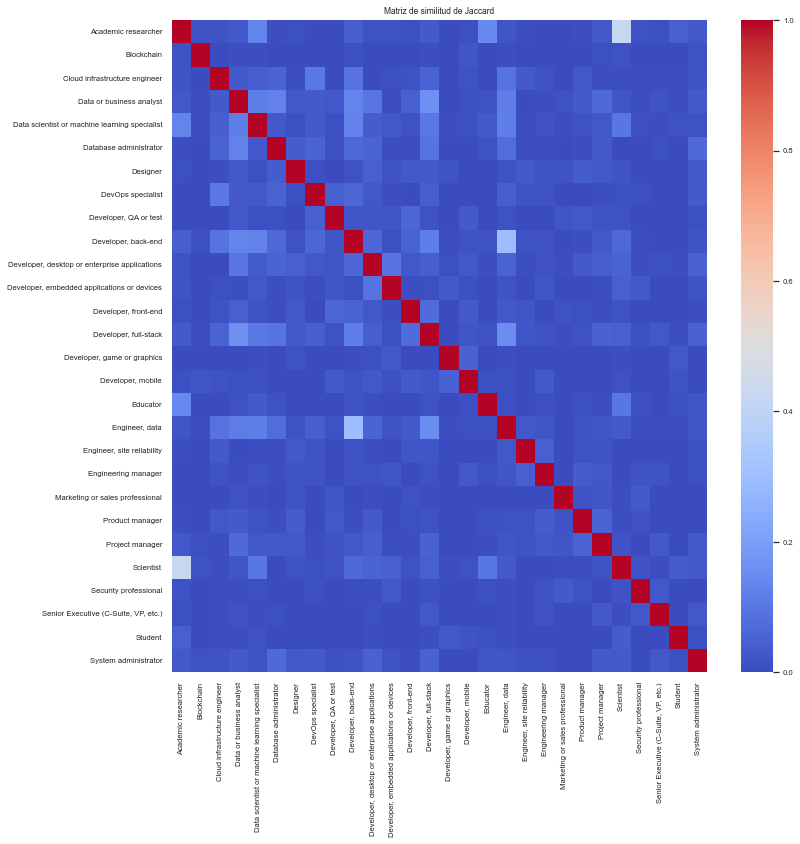

In [589]:
# Asumiendo que df_similitud_jaccard es el DataFrame que contiene la matriz de similitud de Jaccard
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura (ancho, alto) en pulgadas
sns.heatmap(df_similitud_jaccard, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matriz de similitud de Jaccard")

plt.savefig("../paper/data-preparation/train/jaccard-jobs.pdf");

In [590]:
# Another similar approach: Splitting Job_Title using CountVectorizer
'''import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Suponiendo que tu DataFrame se llama wdf y tiene una columna llamada 'Job_title'
job_titles = wdf['Job_title']

# Creamos una instancia de CountVectorizer con el patrón de token adecuado para separar los títulos de trabajo
vectorizer = CountVectorizer(token_pattern=r'[^;]+')

# Ajustamos y transformamos la columna 'Job_title'
job_title_vectors = vectorizer.fit_transform(job_titles)

# Muestra el vocabulario
print(vectorizer.vocabulary_)'''

"import pandas as pd\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# Suponiendo que tu DataFrame se llama wdf y tiene una columna llamada 'Job_title'\njob_titles = wdf['Job_title']\n\n# Creamos una instancia de CountVectorizer con el patrón de token adecuado para separar los títulos de trabajo\nvectorizer = CountVectorizer(token_pattern=r'[^;]+')\n\n# Ajustamos y transformamos la columna 'Job_title'\njob_title_vectors = vectorizer.fit_transform(job_titles)\n\n# Muestra el vocabulario\nprint(vectorizer.vocabulary_)"

In [591]:
'''job_title_vectors'''

'job_title_vectors'

- **Objective**

Clean and structure the 'Job_title' column for better analysis and understanding of job titles especially focusing on AI/ML related fields.

- **Approach**
    - **Identifying Unique Job Titles**: Iterated over the 'Job_title' column to create a list of unique job titles excluding 'Other (please specify):'.
    - **Filtering AI/ML Fields**: Created a function to identify rows with AI/ML related fields and retained only those rows in the data frame.
    - **Cleaning Job Titles**: Developed a function to clean the 'Job_title' entries by removing unnecessary parts and formatting the entries for uniformity. This includes sorting the job titles alphabetically and joining them with semicolons.
    - **One-Hot Encoding**: Expanded the unique job titles into separate columns using one-hot encoding for each job title present in the data frame.
    - **Jaccard Similarity Matrix**: Utilized the Jaccard similarity metric to find the similarity between different job titles and visualized it using a heatmap.
    

- **Outcome**

    - **Cleaned Job Titles**: The 'Job_title' column was streamlined with cleaned, sorted, and uniquely identified job titles.
    - **Focused Data Frame**: The data frame now mainly includes entries with AI/ML related fields, facilitating focused analysis.
    - **Similarity Insights**: The heatmap based on Jaccard similarity provides insights into the relationships between different job titles, aiding in understanding commonalities and differences in the roles. 

## Missing values

### Overview

In [592]:
wdf_extended.isna().sum() # The missing values in the 'Experience' should be imputed, they're a lot and its valuable data

Job_type                                           0
Remote_work                                        0
Coding_as_hobby                                    0
Education                                          0
Certifications                                     0
Job_title                                          0
Company_size                                      41
Country                                            0
Age                                                7
Gender                                            13
Sexual_orientation                                74
Ethnicity                                         38
Physical_disability                                0
Mental_disability                                  0
Work_experience                                  673
Coding_experience                                  9
Annual_salary                                      0
Academic researcher                                0
Blockchain                                    

### Imputation strategies for each column 



#### `Company_size`

Since `Company_size` is a categorical variable and has a relatively small number of missing values, you can use the mode (the most common value) to impute the missing values

In [593]:
wdf_extended['Company_size'].fillna(wdf_extended['Company_size'].mode()[0], inplace=True)

In [594]:
# You could also use the following code to impute the missing values but there is no mode for all the combinations of Job_title and Country

# wdf_extended['Company_size'] = wdf_extended.groupby(['Job_title', 'Country'])['Company_size'].apply(lambda x: x.fillna(x.mode().iloc[0]))


#### `Age`
`Age` have only 9 missing values, so we will drop them.

In [595]:
# we will drop the rows with missing values in the 'Age' column

wdf_extended.dropna(subset=['Age'], inplace=True)

#### `Coding_Experience`

Since `Coding_Experience` is a categorical variable and has a relatively small number of missing values, you can use the mode (the most common value) to impute the missing values
It also has only 9 missing values, so same process as `Age`

In [596]:
wdf_extended.isnull().sum()

Job_type                                           0
Remote_work                                        0
Coding_as_hobby                                    0
Education                                          0
Certifications                                     0
Job_title                                          0
Company_size                                       0
Country                                            0
Age                                                0
Gender                                             8
Sexual_orientation                                69
Ethnicity                                         33
Physical_disability                                0
Mental_disability                                  0
Work_experience                                  669
Coding_experience                                  9
Annual_salary                                      0
Academic researcher                                0
Blockchain                                    

In [597]:
# we will drop the rows with missing values in the 'Coding_experience' column

wdf_extended.dropna(subset=['Coding_experience'], inplace=True)

In [598]:
wdf_extended.Coding_experience.unique()

array(['5', '3', '6', '10', 'Less than 1 year', '26', '15', '9', '28',
       '2', '1', '4', '24', '30', '12', '25', '18', '17', '8', '35', '14',
       '11', '7', '20', '40', '16', '19', '38', '13', '31', '37', '27',
       '22', '21', '23', '41', '46', '34', '32', '42', '50', '45',
       'More than 50 years', '36', '29', '33', '48', '43'], dtype=object)

In [599]:
wdf_extended['Coding_experience'] = pd.to_numeric(wdf_extended['Coding_experience'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}), errors='coerce')
wdf_extended.Coding_experience.unique()

array([ 5. ,  3. ,  6. , 10. ,  0.5, 26. , 15. ,  9. , 28. ,  2. ,  1. ,
        4. , 24. , 30. , 12. , 25. , 18. , 17. ,  8. , 35. , 14. , 11. ,
        7. , 20. , 40. , 16. , 19. , 38. , 13. , 31. , 37. , 27. , 22. ,
       21. , 23. , 41. , 46. , 34. , 32. , 42. , 50. , 45. , 51. , 36. ,
       29. , 33. , 48. , 43. ])

#### `Gender` 

`Gender` is a categorical variable, and you can use the mode grouped by `Job_title` or `Country`, assuming that these features may have an influence on the gender.



In [600]:
wdf_extended['Gender'] = wdf_extended.groupby('Country')['Gender'].apply(lambda x: x.fillna(x.mode().iloc[0])) # with Job_title and Country there's no mode


#### `Sexual_orientation` 

Since `Sexual_orientation` is a categorical variable and has a significant number of missing values, you can create a new category called "Unknown" to represent the missing values.



In [601]:
wdf_extended['Sexual_orientation'].fillna('Unknown', inplace=True)
wdf_extended['Sexual_orientation'].unique()

array(['Bisexual', 'Straight / Heterosexual', 'Prefer not to say',
       'Unknown', 'Gay or Lesbian', 'Queer'], dtype=object)

#### `Ethnicity`

`Ethnicity` is a categorical variable, and you can use the mode grouped by `Country`, assuming that the country of origin may have an influence on the ethnicity.


In [602]:
wdf_extended['Ethnicity'].isna().sum()

32

In [603]:
# For Train data we can use this code:
wdf_extended['Ethnicity'] = wdf_extended.groupby('Country')['Ethnicity'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [604]:
# For test data use this:

"""# Getting the mode of the entire 'Ethnicity' column to use as a fallback
global_mode = wdf_extended['Ethnicity'].mode().iloc[0]

# Define a function to fill NaN values with the mode of the group
# If the group has no mode (all unique values or all NaNs), it uses the global mode
def fillna_with_mode(x):
    # Check if the mode series is empty (no mode found in the group)
    if x.mode().shape[0] == 0:
        # If the mode series is empty, fill NaNs with the global mode
        return x.fillna(global_mode)
    else:
        # If a mode is found in the group, fill NaNs with the mode of the group
        return x.fillna(x.mode().iloc[0])

# Apply the function to each group formed by 'groupby('Country')'
# and assign the result back to the 'Ethnicity' column
wdf_extended['Ethnicity'] = wdf_extended.groupby('Country')['Ethnicity'].apply(fillna_with_mode)"""


"# Getting the mode of the entire 'Ethnicity' column to use as a fallback\nglobal_mode = wdf_extended['Ethnicity'].mode().iloc[0]\n\n# Define a function to fill NaN values with the mode of the group\n# If the group has no mode (all unique values or all NaNs), it uses the global mode\ndef fillna_with_mode(x):\n    # Check if the mode series is empty (no mode found in the group)\n    if x.mode().shape[0] == 0:\n        # If the mode series is empty, fill NaNs with the global mode\n        return x.fillna(global_mode)\n    else:\n        # If a mode is found in the group, fill NaNs with the mode of the group\n        return x.fillna(x.mode().iloc[0])\n\n# Apply the function to each group formed by 'groupby('Country')'\n# and assign the result back to the 'Ethnicity' column\nwdf_extended['Ethnicity'] = wdf_extended.groupby('Country')['Ethnicity'].apply(fillna_with_mode)"


#### `Work_Exp`

Since `Experience` is a numeric variable and has a significant number of missing values (1/3 of the total rows), I recommend using a more advanced approach like KNN Imputer. KNN Imputer uses the k-nearest neighbors to estimate the missing values.

In [605]:
wdf_before_kNNImputer = wdf_extended.copy()

In [606]:
wdf_before_kNNImputer.shape

(2244, 45)

In [607]:
wdf_before_kNNImputer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 26704
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Job_type                                       2244 non-null   object 
 1   Remote_work                                    2244 non-null   object 
 2   Coding_as_hobby                                2244 non-null   object 
 3   Education                                      2244 non-null   object 
 4   Certifications                                 2244 non-null   object 
 5   Job_title                                      2244 non-null   object 
 6   Company_size                                   2244 non-null   object 
 7   Country                                        2244 non-null   object 
 8   Age                                            2244 non-null   object 
 9   Gender                                         2244

In [608]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

# Define ordinal cols and order
ordinal_columns = ['Education', 'Company_size', 'Age', 'Coding_as_hobby', 'Certifications']
ordinal_categories = [
    ['Less than a Bachelor\'s', 'Bachelor\'s degree', 'Master\'s degree', 'Post grad'],
    ['XS', 'S', 'M', 'L', 'XL'],
    ['Prefer not to say','Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'],
    ['no', 'yes'],
    ['no', 'yes']
]

# Define one-hot cols
onehot_columns = ['Job_type', 'Remote_work', 'Gender', 'Sexual_orientation', 'Ethnicity', 'Physical_disability', 'Mental_disability']

# set transformations
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_transformer = OneHotEncoder(sparse=False)

# Adjust and transform ordinal cols
wdf_extended_ordinal_transformed = ordinal_transformer.fit_transform(wdf_extended[ordinal_columns])

# Adjust and transform one-hot cols 
wdf_extended_onehot_transformed = onehot_transformer.fit_transform(wdf_extended[onehot_columns])

# Concatenate
wdf_extended_transformed = np.hstack([wdf_extended_ordinal_transformed, wdf_extended_onehot_transformed])

# Create a KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Impute missing values from 'Experience' using transformed characteristics
experience_transformed = knn_imputer.fit_transform(np.hstack([wdf_extended_transformed, wdf_extended['Work_experience'].values.reshape(-1, 1)]))

# Rounding
experience_imputed_rounded = np.round(experience_transformed[:, -1], 1)

# Replace with imputed values
wdf_extended['Work_experience'] = experience_imputed_rounded

# Reverse one-hot transformations
wdf_extended.loc[:, onehot_columns] = onehot_transformer.inverse_transform(wdf_extended_onehot_transformed)

#wdf_extended.reset_index(drop=True, inplace=True)

# Correct comparison
comparison = pd.DataFrame({'Original': wdf_before_kNNImputer['Work_experience'], 'Imputed': wdf_extended['Work_experience']})
comparison['Difference'] = comparison.apply(lambda row: pd.isna(row['Original']) and not pd.isna(row['Imputed']), axis=1)

imputed_values = comparison[comparison['Difference']]

num_imputed_values = len(imputed_values)
unique_imputed_values = imputed_values['Imputed'].nunique()

print(f"Number of imputed values: {num_imputed_values}")
print(f"Number of unique imputed values: {unique_imputed_values}")

Number of imputed values: 665
Number of unique imputed values: 140


In [609]:
# Makes sense?:
wdf_extended.loc[imputed_values.index, ['Age','Work_experience']].sample(20)

,Age,Work_experience
9803,18-24 years old,4.4
4825,18-24 years old,4.0
6322,55-64 years old,26.8
16754,25-34 years old,4.2
2664,25-34 years old,6.0
9464,25-34 years old,6.4
21834,25-34 years old,6.2
20742,25-34 years old,7.2
20142,25-34 years old,4.8
3105,25-34 years old,9.0


In [610]:
wdf_extended.isna().any().sum()

0

In [611]:
wdf_extended.Annual_salary.info()

<class 'pandas.core.series.Series'>
Int64Index: 2244 entries, 0 to 26704
Series name: Annual_salary
Non-Null Count  Dtype  
--------------  -----  
2244 non-null   float64
dtypes: float64(1)
memory usage: 99.6 KB


To see how the encoded dataset looks like

In [612]:
# Crear un DataFrame para las columnas ordinales transformadas
wdf_extended_ordinal_transformed_df = pd.DataFrame(wdf_extended_ordinal_transformed, columns=ordinal_columns)

# Obtener los nombres de las nuevas columnas generadas por el OneHotEncoder
onehot_transformer_columns = onehot_transformer.get_feature_names_out(onehot_columns)

# Crear un DataFrame para las columnas one-hot transformadas
wdf_extended_onehot_transformed_df = pd.DataFrame(wdf_extended_onehot_transformed, columns=onehot_transformer_columns)

# Restablecer los índices de todos los DataFrames
wdf_extended_ordinal_transformed_df.reset_index(drop=True, inplace=True)
wdf_extended_onehot_transformed_df.reset_index(drop=True, inplace=True)
wdf_extended['Work_experience'].reset_index(drop=True, inplace=True)
wdf_extended['Coding_experience'].reset_index(drop=True, inplace=True)
wdf_extended['Country'].reset_index(drop=True, inplace=True)

# Añadir la siguiente línea después de restablecer los índices de todos los DataFrames
wdf_extended['Annual_salary'].reset_index(drop=True, inplace=True)
job_title_dummies.reset_index(drop=True, inplace=True)

# Concatenar los DataFrames transformados y la columna 'Experience'
wdf_extended_full_encoded = pd.concat([wdf_extended_ordinal_transformed_df, wdf_extended_onehot_transformed_df, job_title_dummies, 
                                           wdf_extended['Work_experience'],wdf_extended['Coding_experience'],
                                           wdf_extended['Annual_salary'], wdf_extended['Country']], axis=1)

# Job_title_dummies has 22 rows more, consequently, some NANs were generated. Let's drop all NAN rows:

wdf_extended_full_encoded.dropna(inplace=True)

# Verificar la forma del DataFrame transformado completo
print(wdf_extended_full_encoded.shape)

(2244, 76)


In [613]:
wdf_before_kNNImputer.Coding_experience.head()

0      5.0
3      3.0
10     5.0
35     6.0
56    10.0
Name: Coding_experience, dtype: float64

In [614]:
wdf_extended_full_encoded.Coding_experience.head()

0     5.0
1     3.0
2     5.0
3     6.0
4    10.0
Name: Coding_experience, dtype: float64

## Save the encoded dataset

In [615]:
wdf_extended_full_encoded.isnull().sum()

Education               0
Company_size            0
Age                     0
Coding_as_hobby         0
Certifications          0
                       ..
System administrator    0
Work_experience         0
Coding_experience       0
Annual_salary           0
Country                 0
Length: 76, dtype: int64

In [616]:
import os

# ...

clean_and_encoded_df = wdf_extended_full_encoded.copy()
clean_and_encoded_df.to_csv('../output/clean_train_df.csv', index=False)

clean_and_encoded_df.to_csv('../input/clean_train_df.csv', index=False)

# Save in Baseline models folder
# baseline_models_path = os.path.join('..', 'Baseline_Models', 'clean_test_df.csv')
# clean_and_encoded_df.to_csv(baseline_models_path, index=False)


In [617]:
pd.read_csv('../input/clean_train_df.csv').sample(10)

,Education,Company_size,Age,Coding_as_hobby,Certifications,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Remote_work_hybrid,...,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Coding_experience,Annual_salary,Country
1197,1.0,4.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,4.0,3.0,140496.0,Israel
261,3.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,4.0,3.0,90000.0,USA
1605,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,9.0,9.0,36112.0,India
507,1.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,9.0,9.0,160000.0,USA
1097,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,11.8,11.0,95979.0,Germany
1972,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,25.0,4.0,74310.0,Australia
526,1.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,11.0,10.0,126000.0,USA
1217,2.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,5.0,5.0,107616.0,Israel
1302,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,8.0,8.0,44148.0,France
1835,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,10.2,2.0,22764.0,South Africa


### Correlation Matrix

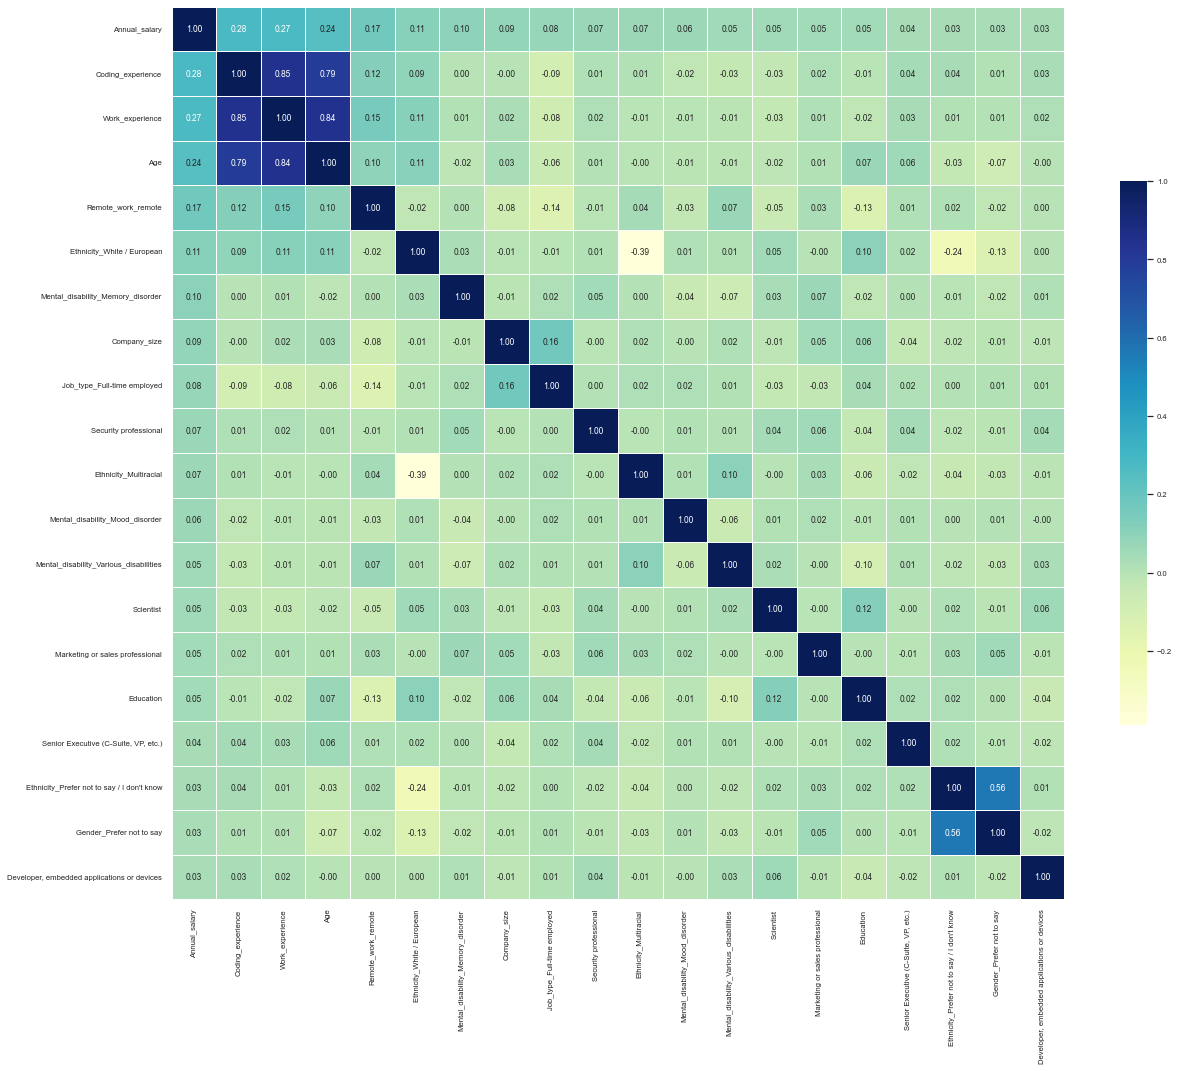

In [618]:
# Calculate the correlation matrix
corr_matrix = wdf_extended_full_encoded.corr()

# Set the threshold for selecting the top n features
n = 20

# Select the top n most correlated features
top_corr_features = corr_matrix.nlargest(n, 'Annual_salary')['Annual_salary'].index

# Calculate the correlation matrix for the top n features
top_corr_matrix = wdf_extended_full_encoded[top_corr_features].corr()

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(top_corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("../paper/data-preparation/train/corr-matrix.pdf");

## Additional Resources

**Links:**

Survey insights

-  https://survey.stackoverflow.co/2022/

Kaggle:
- EDA y XGBoostRegressor(https://www.kaggle.com/code/do1likethis/which-devs-get-paid-more-and-why)
- Data Preprocessing (https://www.kaggle.com/code/th1402/data-preprocessing-analysis-for-so-dev-survey-2022#Fill-remaining-missing-values)
- Easy Data Cleaning and regressors comparison with Pycaret (https://www.kaggle.com/code/soheiltehranipour/stackoverflow-2022-salary-prediction)

**Notes**

One-hot encoding can be used to handle categorical features, but it can make the data too complex to analyze. One-hot encoding creates multiple binary features for each possible option in a categorical feature. This can lead to a high number of features, making it difficult to interpret the data. Therefore, another method is needed to gain insights from the data.